<a href="https://colab.research.google.com/github/i-saw/Cleaning_dataset_with_images/blob/main/_fastdub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Очистка папки с изображениями от дубликатов, испорченных , засвеченных и других проблемных изображений при подготовке датасета с Fastdub


В этом блокноте показано, как с помощью fastdup можно проанализировать папку с изображениями на предмет потенциальных проблем и получить список проблемных Изображений. Также код для удаления.
# *ВНИМАНИЕ!!! Код с удалением из папки в самом внизу!!!*



## Установка


In [ ]:
!pip install fastdup -Uq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.2/125.2 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 933.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.3/92.3 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 65.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.2/189.2 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.2/133.2 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 63.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 60.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.4/28.4 MB 33.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.9/

Теперь протестируем установку, распечатав версию. Если сообщения об ошибке нет, мы готовы к работе!

In [ ]:
import fastdup
import os
fastdup.__version__

'2.13'

## Загрузим набор данных

В моем случае это google диск


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Запускаем fastdup

Для этого давайте создадим объект `fastdup` и укажем входной каталог, который указывает на папку с изображениями.

In [ ]:
input_dir="/content/gdrive/MyDrive/downloaded_images_Пицца"
fd = fastdup.create(input_dir=input_dir)


fastdup By Visual Layer, Inc. 2024. All rights reserved.

A fastdup dataset object was created!

Input directory is set to "/content/gdrive/MyDrive/downloaded_images_Пицца"
Work directory is set to "work_dir"

The next steps are:
   1. Analyze your dataset with the .run() function of the dataset object
   2. Interactively explore your data on your local machine with the .explore() function of the dataset object

For more information, use help(fastdup) or check our documentation https://docs.visual-layer.com/docs/getting-started-with-fastdup.



> **ПРИМЕЧАНИЕ**: Если вы запускаете этот пример в Google Colab, мы рекомендуем запускать с `num_images = не более 40000` . Это ограничивает выполнение fastdup для 40000 изображений вместо всего набора данных, что в Google Colab занимает меньше времени.

In [ ]:
# fd.run(num_images=40000, ccthreshold=0.9)   # запускает fastdup для подмножества из 40 000 изображений из набора данных
fd.run(ccthreshold=0.97, threshold=0.9, overwrite=True)                       # запускает fastdup для всего набора данных

fastdup By Visual Layer, Inc. 2024. All rights reserved.
Creating visualization:  67%|██████▋   | 2/3 [01:04<00:37, 37.75s/it]/usr/local/lib/python3.10/dist-packages/fastdup/fastdup_controller.py:210: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  df_annot = self._df_annot.query(f'{FD.ANNOT_VALID}') if valid_only and self._df_annot is not None \
Done: 100%|██████████| 3/3 [01:06<00:00, 22.19s/it]


Analysis complete. Use the .explore() function to interactively explore your data on your local machine.

Alternatively, you can generate HTML-based galleries.
For more information, use help(fastdup) or check our documentation https://docs.visual-layer.com/docs/getting-started-with-fastdup.



0

По умолчанию: ***cc_threshold=0.96***.
Параметр ccthreshold управляет расстоянием, используемым для определения того, принадлежат ли два изображения к одному кластеру сходства, рассчитанному с помощью алгоритма «Связанные компоненты».

По умолчанию:***threshold=0.9***.
Порог сходства устанавливает минимальное значение сходства, полезное для анализа fastdup. Два изображения, которые не соответствуют этому порогу, не будут соединены вместе ни в коем случае, за исключением анализа выбросов.

***overwrite=True***  - позволяет перезаписывать данные , то есть если несколько раз запускается  fd.run , то он должен быть обязательно =True

Получите сводку о выполнении, показывающую потенциально проблемные файлы.

In [ ]:
fd.summary()


 ########################################################################################

Dataset Analysis Summary: 

    Dataset contains 674 images
    Valid images are 100.00% (674) of the data, invalid are 0.00% (0) of the data
    Outliers: 6.68% (45) of images are possible outliers, and fall in the bottom 5.00% of similarity values.
    For a detailed list of outliers, use `.outliers()`.



['Dataset contains 674 images',
 'Valid images are 100.00% (674) of the data, invalid are 0.00% (0) of the data',
 'Outliers: 6.68% (45) of images are possible outliers, and fall in the bottom 5.00% of similarity values.',
 'For a detailed list of outliers, use `.outliers()`.\n']

## Поврежденные изображения

Самый легкий способ - найти список поврежденных изображений и удалить их из вашего набора данных. Скорее всего, эти изображения представляют собой поврежденный файл, и их не удалось загрузить.

Чтобы получить поврежденные изображения, запустим

In [ ]:
broken_images = fd.invalid_instances()
broken_images

Empty DataFrame
Columns: [filename, index, error_code, is_valid, fd_index]
Index: []

## Список поврежденных изображений
Однако, если есть поврежденные изображения, мы можем легко получить такой список .

In [ ]:
list_of_broken_images = broken_images['filename'].to_list()
list_of_broken_images

[]

## Дубликаты изображений

Откроем галерею дубликатов изображений. Расстояние `1,0` указывает на то, что пары изображений являются точными копиями.

Generating gallery:   0%|          | 0/5 [00:00<?, ?it/s]

Stored similarity visual view in  work_dir/galleries/duplicates.html
########################################################################################
Would you like to see awesome visualizations for some of the most popular academic datasets?
Click here to see and learn more: https://app.visual-layer.com/vl-datasets?utm_source=fastdup
########################################################################################



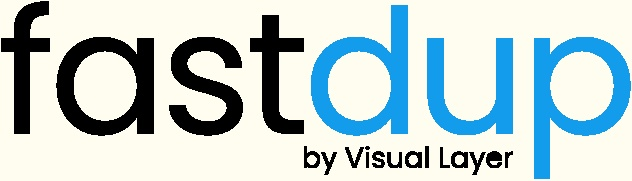
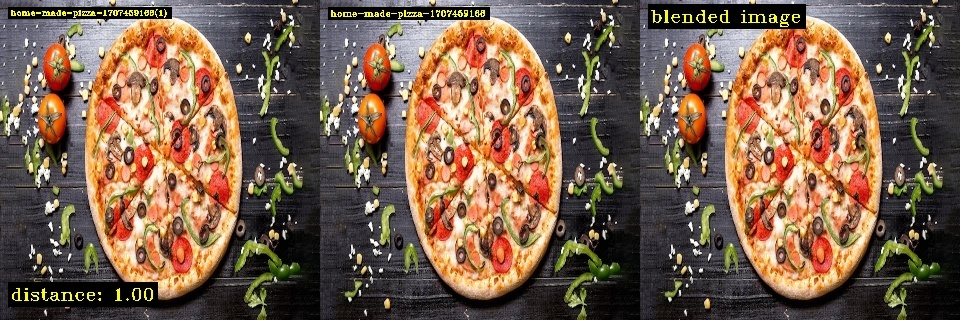
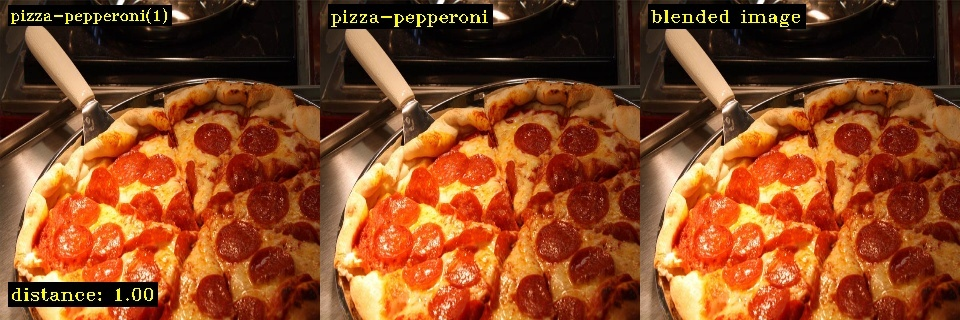
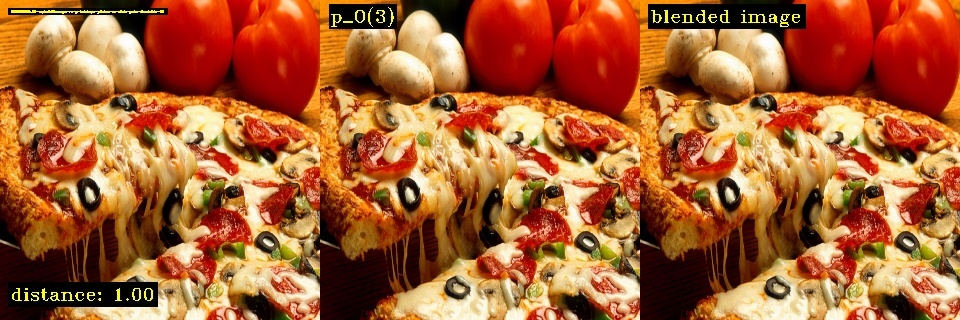

0

In [ ]:
fd.vis.duplicates_gallery(num_images=5)

## Кластеры изображений

Визуализируем кластеры изображений из набора данных.

>  **Примечание** : При установке параметра `num_images = 5` отображается галерея из 5 строк. Измените это значение, чтобы просмотреть больше / меньше.

Generating gallery:   0%|          | 0/5 [00:00<?, ?it/s]

Finished OK. Components are stored as image files work_dir/galleries/components_[index].jpg
Stored components visual view in  work_dir/galleries/components.html
Execution time in seconds 0.7
########################################################################################
Would you like to see awesome visualizations for some of the most popular academic datasets?
Click here to see and learn more: https://app.visual-layer.com/vl-datasets?utm_source=fastdup
########################################################################################



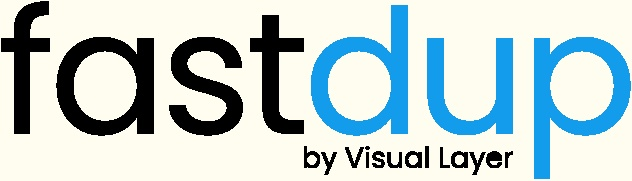
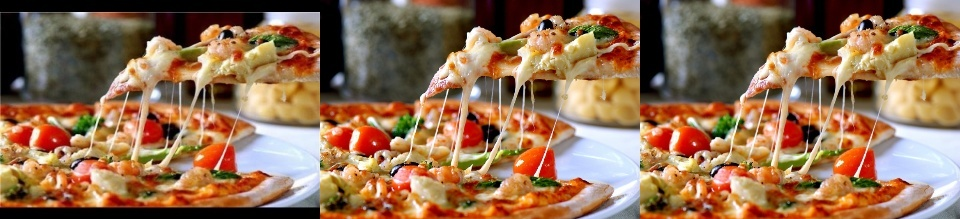
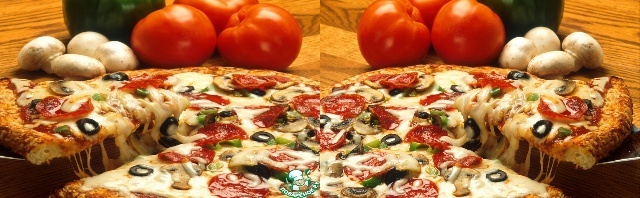
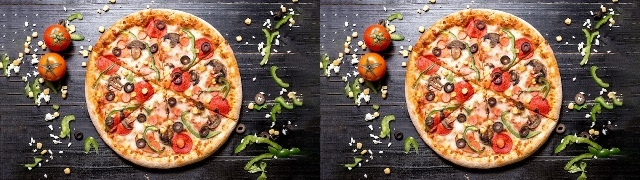
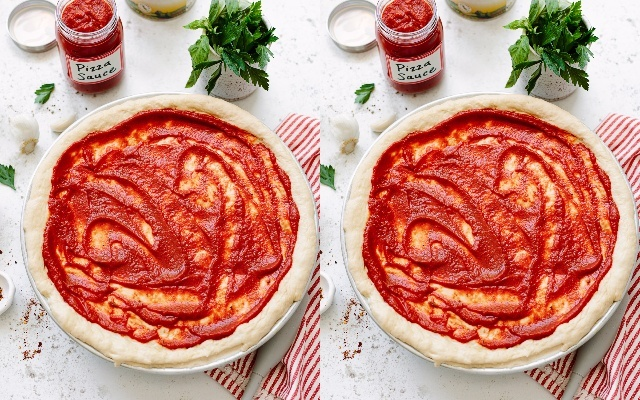
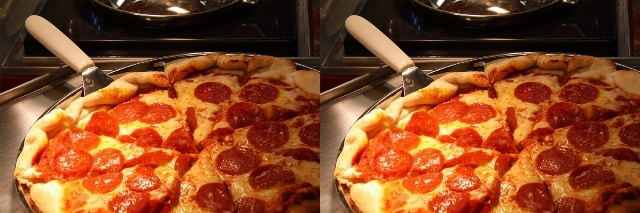

0

In [ ]:
fd.vis.component_gallery(num_images=5)

## Список дубликатов
Выделим все дубликаты и почти дубликаты, запустив с помощью функции подключенные компоненты:



In [ ]:
connected_components_df , _ = fd.connected_components()
connected_components_df

index  component_id  count  mean_distance  min_distance  max_distance                                                                                                                  filename error_code  is_valid  fd_index
0      26            26      4       0.972704      0.972704      0.972704                                                         gdrive/MyDrive/downloaded_images_Пицца/1489558_88283-710x550x.jpg      VALID      True        26
1      50            50      4       0.999912      0.999912      0.999912  gdrive/MyDrive/downloaded_images_Пицца/1663797384_24-mykaleidoscope-ru-p-bolshaya-pitstsa-na-stole-yeda-vkontakte-28.jpg      VALID      True        50
2      59            26      4       0.972704      0.972704      0.972704                                                                      gdrive/MyDrive/downloaded_images_Пицца/178950651.jpg      VALID      True        59
3     150           149      4       0.992005      0.992005      0.992005                                               gdrive/MyDrive/downloaded_images_Пицца/63a7cf823cbc743612bc449a222fb46f.jpg      VALID      True       150
4     239           238      4       0.998991      0.998991      0.998991                                               gdrive/MyDrive/downloaded_images_Пицца/c94c918728dc98af7fd6d8e0eb4a428d.jpg      VALID      True       239
..    ...           ...    ...            ...           ...           ...                                                                                                                       ...        ...       ...       ...
34    615           599      4       0.995299      0.995299      0.995299               gdrive/MyDrive/downloaded_images_Пицца/shutterstock_396105979_1675349908-scaled-e1675349958144-1280x640.jpg      VALID      True       615
35    634           282      4       0.974311      0.974311      0.974311                                                              gdrive/MyDrive/downloaded_images_Пицца/thumb-1920-284245.jpg      VALID      True       634
36    635           238      4       0.998991      0.998991      0.998991                                                              gdrive/MyDrive/downloaded_images_Пицца/thumb-1920-357914.jpg      VALID      True       635
37    667           469      4       0.991413      0.991413      0.991413                                                                        gdrive/MyDrive/downloaded_images_Пицца/пицца_3.jpg      VALID      True       667
38    670           440      4       0.995173      0.995173      0.995173                                                                  gdrive/MyDrive/downloaded_images_Пицца/Пицца-обои002.jpg      VALID      True       670

[39 rows x 10 columns]

Теперь напишем служебную функцию для получения кластеров:

In [ ]:
# функция для группировки подключенных компонентов
def get_clusters(df, sort_by='count', min_count=2, ascending=False):
    # столбцы для агрегирования
    agg_dict = {'filename': list, 'mean_distance': max, 'count': len}

    if 'label' in df.columns:
        agg_dict['label'] = list

    # фильтруем по количеству
    df = df[df['count'] >= min_count]

    # групповые и сводные столбцы
    grouped_df = df.groupby('component_id').agg(agg_dict)

    # сортируем
    grouped_df = grouped_df.sort_values(by=[sort_by], ascending=ascending)
    return grouped_df

In [ ]:
clusters_df = get_clusters(connected_components_df)
clusters_df.head()

filename  mean_distance  count
component_id                                                                                                                                                                                                   
327           [gdrive/MyDrive/downloaded_images_Пицца/hqdefault.jpg, gdrive/MyDrive/downloaded_images_Пицца/pizza-5179939_960_720.jpg, gdrive/MyDrive/downloaded_images_Пицца/p_O(2).jpg]       0.982580      3
26                                                              [gdrive/MyDrive/downloaded_images_Пицца/1489558_88283-710x550x.jpg, gdrive/MyDrive/downloaded_images_Пицца/178950651.jpg]       0.972704      2
323                                     [gdrive/MyDrive/downloaded_images_Пицца/home-made-pizza-1707459166(1).jpg, gdrive/MyDrive/downloaded_images_Пицца/home-made-pizza-1707459166.jpg]       1.000000      2
553                                                     [gdrive/MyDrive/downloaded_images_Пицца/Pizza-Sauce-Spread(1).jpg, gdrive/MyDrive/downloaded_images_Пицца/Pizza-Sauce-Spread.jpg]       0.999123      2
547                                                           [gdrive/MyDrive/downloaded_images_Пицца/pizza-pepperoni(1).jpg, gdrive/MyDrive/downloaded_images_Пицца/pizza-pepperoni.jpg]       1.000000      2

Выше показан компонент (кластеры) с наибольшим количеством дубликатов / почти дубликатов.

Теперь давайте сохраним по одному изображению из каждого кластера и удалим остальные:



In [ ]:
# Выбираем первый из каждого сохраненного кластера
cluster_images_to_keep = []
list_of_duplicates = []

for cluster_file_list in clusters_df.filename:
    # сохраним первый файл, остальные отбросим
    keep = cluster_file_list[0]
    discard = cluster_file_list[1:]

    cluster_images_to_keep.append(keep)
    list_of_duplicates.extend(discard)

print(f"Found {len(set(list_of_duplicates))} очень похожие изображения  отбросим")

Found 20 очень похожие изображения  отбросим


In [ ]:
# Посмотрим на список найденных дубликатов
print(list_of_duplicates)

['gdrive/MyDrive/downloaded_images_Пицца/pizza-5179939_960_720.jpg', 'gdrive/MyDrive/downloaded_images_Пицца/p_O(2).jpg', 'gdrive/MyDrive/downloaded_images_Пицца/178950651.jpg', 'gdrive/MyDrive/downloaded_images_Пицца/home-made-pizza-1707459166.jpg', 'gdrive/MyDrive/downloaded_images_Пицца/Pizza-Sauce-Spread.jpg', 'gdrive/MyDrive/downloaded_images_Пицца/pizza-pepperoni.jpg', 'gdrive/MyDrive/downloaded_images_Пицца/Pizza_Hut_MELTS.jpg', 'gdrive/MyDrive/downloaded_images_Пицца/pizza-pizza-hut-cooking-kitchen.jpg', 'gdrive/MyDrive/downloaded_images_Пицца/пицца_3.jpg', 'gdrive/MyDrive/downloaded_images_Пицца/Пицца-обои002.jpg', 'gdrive/MyDrive/downloaded_images_Пицца/pizza-cheese.jpeg', 'gdrive/MyDrive/downloaded_images_Пицца/p_O(3).jpg', 'gdrive/MyDrive/downloaded_images_Пицца/GettyImages-133281966-pizza-delivery-56a9a3003df78cf772a91e8f.jpg', 'gdrive/MyDrive/downloaded_images_Пицца/maxresdefault(14).jpg', 'gdrive/MyDrive/downloaded_images_Пицца/thumb-1920-284245.jpg', 'gdrive/MyDrive/dow

## Выбросы

Визуализируем галерею выбросов. Меньшее значение `Distance` указывает на более высокую вероятность выбросов.

Generating gallery:   0%|          | 0/5 [00:00<?, ?it/s]

Stored outliers visual view in  work_dir/galleries/outliers.html
########################################################################################
Would you like to see awesome visualizations for some of the most popular academic datasets?
Click here to see and learn more: https://app.visual-layer.com/vl-datasets?utm_source=fastdup
########################################################################################



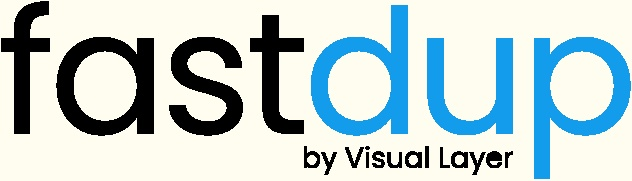
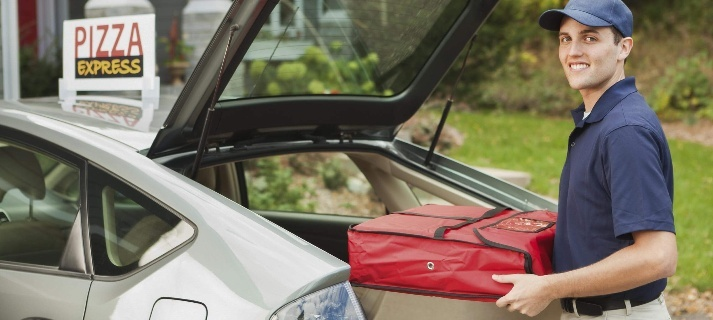
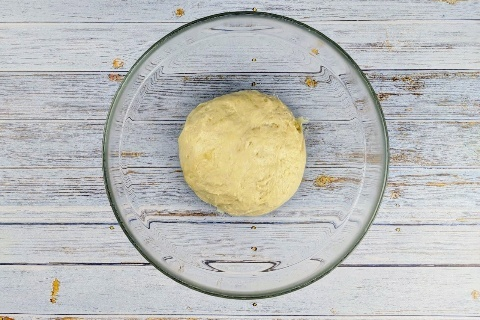
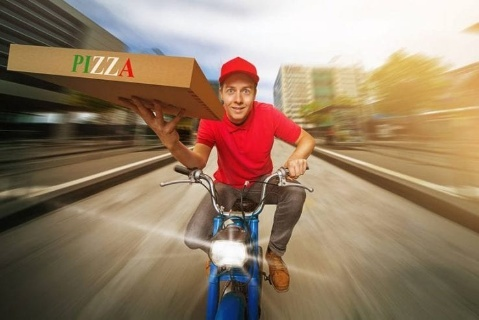
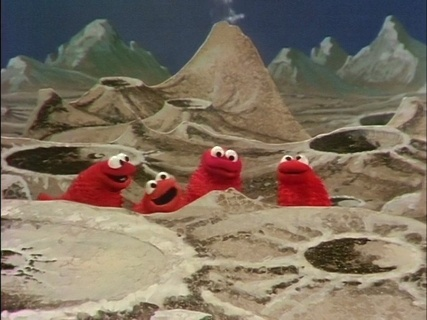
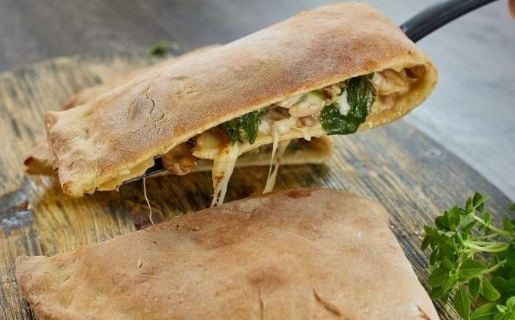

0

In [ ]:
fd.vis.outliers_gallery(num_images=5)

# Список выбросов
Сначала получим `фрейм данных` выбросов:

In [ ]:
outlier_df = fd.outliers()
outlier_df.head()

outlier  nearest  distance                                                            filename_outlier  index_x error_code_outlier  is_valid_outlier  fd_index_outlier                                                                      filename_nearest  index_y error_code_nearest  is_valid_nearest  fd_index_nearest
0      516      638  0.596111              gdrive/MyDrive/downloaded_images_Пицца/Pizza-delivery-jobs.jpg      516              VALID              True               516  gdrive/MyDrive/downloaded_images_Пицца/tmntpizzathrower-inset3__75291.1550253811.jpg      638              VALID              True               638
1      310      449  0.596421                      gdrive/MyDrive/downloaded_images_Пицца/foto-2751-5.jpg      310              VALID              True               310                       gdrive/MyDrive/downloaded_images_Пицца/original_5ede6534182.jpg      449              VALID              True               449
2      513      608  0.598648         gdrive/MyDrive/downloaded_images_Пицца/Pizza-Delivery-2-738x493.jpg      513              VALID              True               513                    gdrive/MyDrive/downloaded_images_Пицца/seminole-pizza-delivery.jpg      608              VALID              True               608
3      627      518  0.608206  gdrive/MyDrive/downloaded_images_Пицца/Take-1-YV121108368363_white-web.jpg      627              VALID              True               627                gdrive/MyDrive/downloaded_images_Пицца/pizza-delivery-man-21238119.jpg      518              VALID              True               518
4      459      455  0.613921                       gdrive/MyDrive/downloaded_images_Пицца/Pepperons.jpeg      459              VALID              True               459                          gdrive/MyDrive/downloaded_images_Пицца/Pepperoni-Pizza-2.jpg      455              VALID              True               455

Давайте рассмотрим все изображения с `distance<0.68` как выбросы.

In [ ]:
list_of_outliers = outlier_df[outlier_df.distance < 0.68].filename_outlier.tolist()
list_of_outliers

['gdrive/MyDrive/downloaded_images_Пицца/Pizza-delivery-jobs.jpg',
 'gdrive/MyDrive/downloaded_images_Пицца/foto-2751-5.jpg',
 'gdrive/MyDrive/downloaded_images_Пицца/Pizza-Delivery-2-738x493.jpg',
 'gdrive/MyDrive/downloaded_images_Пицца/Take-1-YV121108368363_white-web.jpg',
 'gdrive/MyDrive/downloaded_images_Пицца/Pepperons.jpeg',
 'gdrive/MyDrive/downloaded_images_Пицца/1664608336_6336cbac84ab6-1740x1109.jpeg',
 'gdrive/MyDrive/downloaded_images_Пицца/21297769_1835086223174936_1925631808_o.jpg',
 'gdrive/MyDrive/downloaded_images_Пицца/monochrome-set-various-pizza-toppings-cartoon-style-images-various-pizza-toppings-vector_543641-1491.jpg',
 'gdrive/MyDrive/downloaded_images_Пицца/June_2020_166_Pizzahut_coupon_519.jpg',
 'gdrive/MyDrive/downloaded_images_Пицца/pizza-poems6.jpg',
 'gdrive/MyDrive/downloaded_images_Пицца/watermarked_298.jpg',
 'gdrive/MyDrive/downloaded_images_Пицца/b521998739c6bbb9099617d391dea109.jpg',
 'gdrive/MyDrive/downloaded_images_Пицца/pizza%2Binn%2Bcoupons%2

## Темные, яркие и размытые изображения



Визуализируем темные изображения из набора данных в порядке возрастания.

Generating gallery:   0%|          | 0/5 [00:00<?, ?it/s]

Stored mean visual view in  work_dir/galleries/mean.html
########################################################################################
Would you like to see awesome visualizations for some of the most popular academic datasets?
Click here to see and learn more: https://app.visual-layer.com/vl-datasets?utm_source=fastdup
########################################################################################



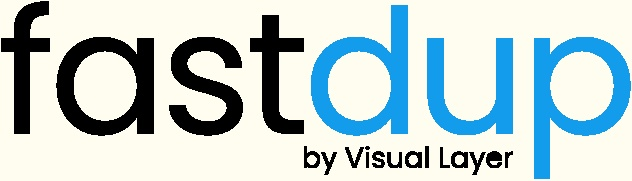
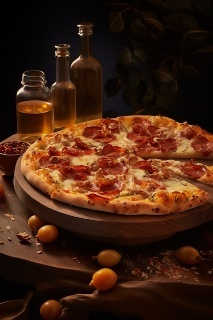
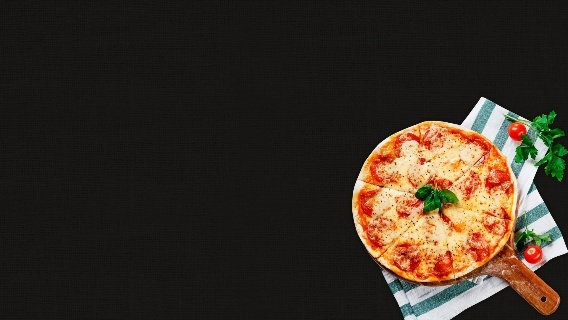
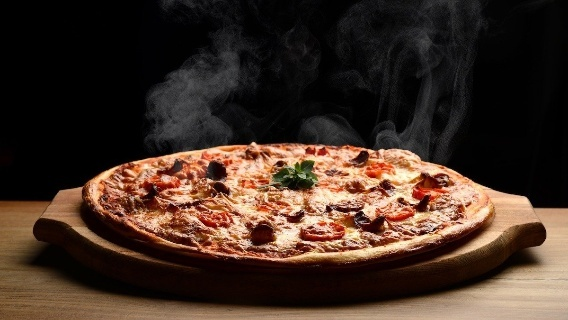
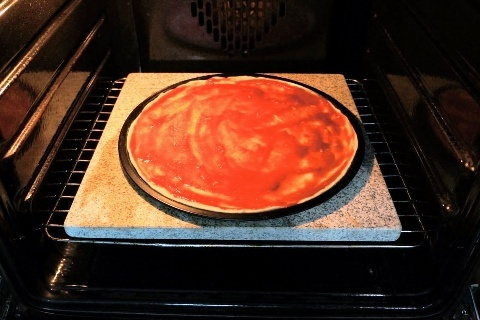
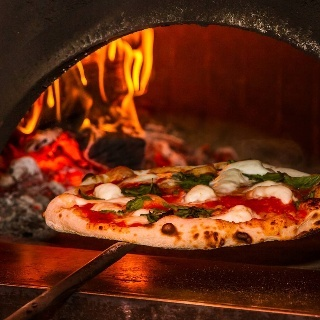

0

In [ ]:
fd.vis.stats_gallery(metric='dark', num_images=5)

# Список темных изображений
Получим `Фрейм данных` статистики изображений.

In [ ]:
stats_df = fd.img_stats()

Если изображение имеет среднее значение <13, то мы приходим к выводу, что это темное изображение:

In [ ]:
dark_images = stats_df[stats_df['mean'] < 13]
dark_images

Empty DataFrame
Columns: [index, img_w, img_h, unique, blur, mean, min, max, stdv, file_size, contrast, filename, error_code, is_valid, fd_index]
Index: []

Получим список темных изображений:

In [ ]:
list_of_dark_images = dark_images['filename'].to_list()
list_of_dark_images

[]

# Список ярких изображений

Визуализируем яркие изображения из набора данных в порядке убывания.

Generating gallery:   0%|          | 0/5 [00:00<?, ?it/s]

Stored mean visual view in  work_dir/galleries/mean.html
########################################################################################
Would you like to see awesome visualizations for some of the most popular academic datasets?
Click here to see and learn more: https://app.visual-layer.com/vl-datasets?utm_source=fastdup
########################################################################################



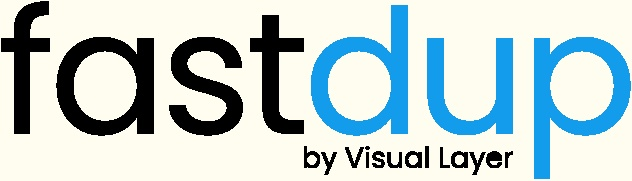
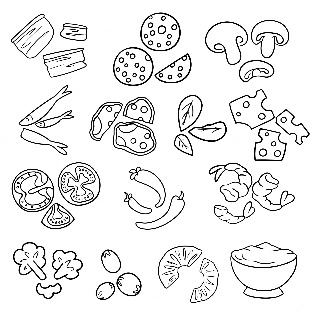
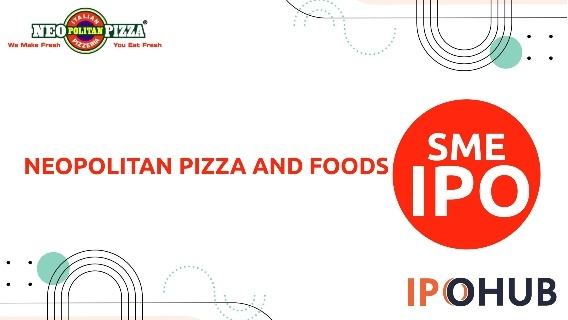
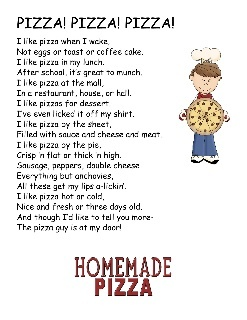
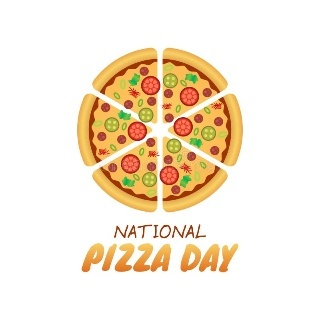
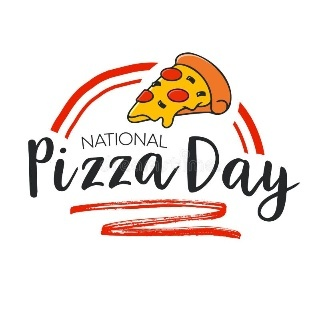

0

In [ ]:
fd.vis.stats_gallery(metric='bright', num_images=5)

Давайте установим, что если "mean> 220,5`, мы заключим, что это яркое изображение. Вы можете установить свой собственный порог среднего значения в зависимости от ваших данных.

In [ ]:
bright_images = stats_df[stats_df['mean'] > 220.5]
bright_images.head()

index  img_w  img_h  unique        blur      mean  min    max     stdv  file_size  contrast                                                                                                                                         filename error_code  is_valid  fd_index
22      22   1200    720     256   3534.9138  226.9488  0.0  255.0  51.7230      43884       1.0                                                                            gdrive/MyDrive/downloaded_images_Пицца/1334794-national-pizza-day.jpg      VALID      True        22
240    240    626    617     256   2555.4282  222.4382  0.0  255.0  60.3040      37879       1.0                                                     gdrive/MyDrive/downloaded_images_Пицца/cartoon-pizza-character-with-cute-face_673247-200.jpg      VALID      True       240
314    314   1400    980     252  15735.3125  223.0599  0.0  255.0  49.7686     234882       1.0                                                                        gdrive/MyDrive/downloaded_images_Пицца/funny-pizza-pictures-clipart-3.jpg      VALID      True       314
431    431   2000   2000     256  56575.3906  235.8930  0.0  255.0  63.7550     362883       1.0  gdrive/MyDrive/downloaded_images_Пицца/monochrome-set-various-pizza-toppings-cartoon-style-images-various-pizza-toppings-vector_543641-1491.jpg      VALID      True       431
439    439    800    800     256   9024.4990  231.2294  0.0  255.0  63.8802      49125       1.0                                                                          gdrive/MyDrive/downloaded_images_Пицца/national-pizza-day-236555644.jpg      VALID      True       439

Получим список ярких изображений

In [ ]:
list_of_bright_images = bright_images['filename'].to_list()
list_of_bright_images

['gdrive/MyDrive/downloaded_images_Пицца/1334794-national-pizza-day.jpg',
 'gdrive/MyDrive/downloaded_images_Пицца/cartoon-pizza-character-with-cute-face_673247-200.jpg',
 'gdrive/MyDrive/downloaded_images_Пицца/funny-pizza-pictures-clipart-3.jpg',
 'gdrive/MyDrive/downloaded_images_Пицца/monochrome-set-various-pizza-toppings-cartoon-style-images-various-pizza-toppings-vector_543641-1491.jpg',
 'gdrive/MyDrive/downloaded_images_Пицца/national-pizza-day-236555644.jpg',
 'gdrive/MyDrive/downloaded_images_Пицца/NeoPolitan-Pizza-and-Foods-IPO-scaled.jpg',
 'gdrive/MyDrive/downloaded_images_Пицца/pizza-poems6.jpg',
 'gdrive/MyDrive/downloaded_images_Пицца/vector-graphic-national-pizza-day-good-celebration-flat-design-flyer-illustration-238786476.jpg']

# Список размытых изображений

Визуализируем размытые изображения из набора данных в порядке возрастания.

Generating gallery:   0%|          | 0/5 [00:00<?, ?it/s]

Stored blur visual view in  work_dir/galleries/blur.html
########################################################################################
Would you like to see awesome visualizations for some of the most popular academic datasets?
Click here to see and learn more: https://app.visual-layer.com/vl-datasets?utm_source=fastdup
########################################################################################



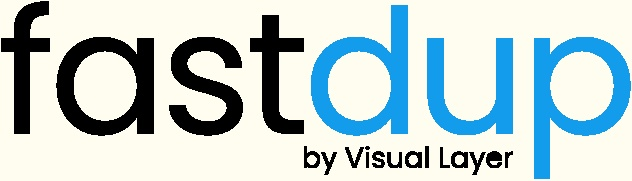
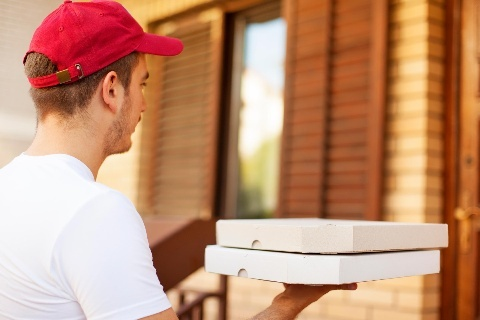
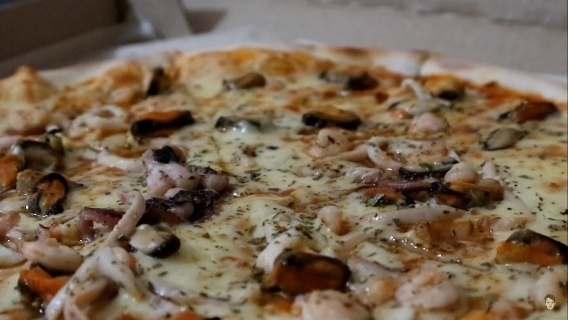
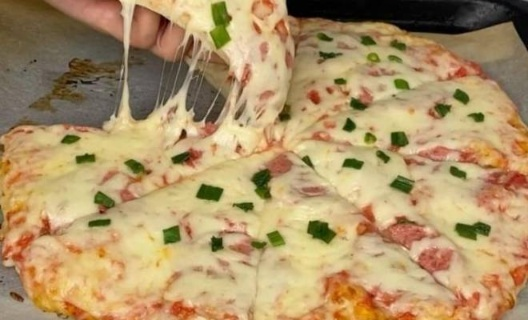
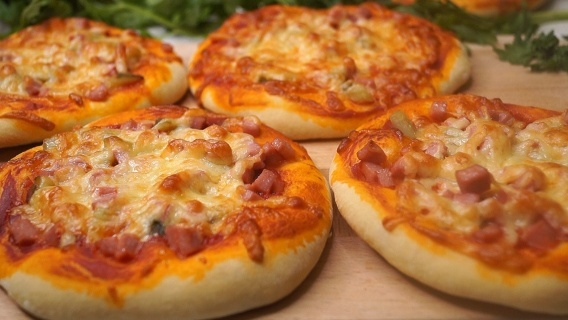
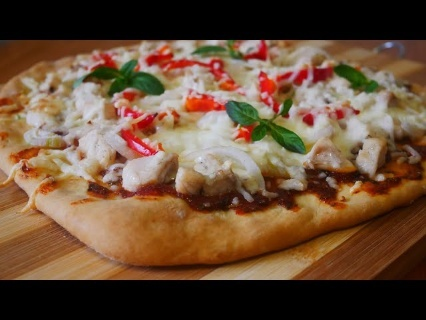

0

In [ ]:
fd.vis.stats_gallery(metric='blur', num_images=5)

In [ ]:
blurry_images = stats_df[stats_df['blur'] < 50]
blurry_images.head()

Empty DataFrame
Columns: [index, img_w, img_h, unique, blur, mean, min, max, stdv, file_size, contrast, filename, error_code, is_valid, fd_index]
Index: []

Получим список размытых изображений

In [ ]:
list_of_blurry_images = blurry_images['filename'].to_list()
list_of_blurry_images

[]

## Результаты анализа папки с изображениями

Выведем количество файлов в каждом списке, которые мы получили выше.

In [ ]:
print(f"Поврежденные: {len(list_of_broken_images)}")
print(f"Дубликаты: {len(list_of_duplicates)}")
print(f"Выбросы: {len(list_of_outliers)}")
print(f"Тёмные: {len(list_of_dark_images)}")
print(f"Засвеченые: {len(list_of_bright_images)}")
print(f"Размытые: {len(list_of_blurry_images)}")

problem_images = list_of_duplicates + list_of_broken_images + list_of_outliers + list_of_dark_images + list_of_bright_images + list_of_blurry_images

print(f"Всего проблемных изображений: {len(set(problem_images))}")

Поврежденные: 0
Дубликаты: 20
Выбросы: 24
Тёмные: 0
Засвеченые: 8
Размытые: 0
Всего проблемных изображений: 48


In [ ]:
# Оторбражаем получившийся общий список с проблемными изображениями
print(problem_images)

['gdrive/MyDrive/downloaded_images_Пицца/pizza-5179939_960_720.jpg', 'gdrive/MyDrive/downloaded_images_Пицца/p_O(2).jpg', 'gdrive/MyDrive/downloaded_images_Пицца/178950651.jpg', 'gdrive/MyDrive/downloaded_images_Пицца/home-made-pizza-1707459166.jpg', 'gdrive/MyDrive/downloaded_images_Пицца/Pizza-Sauce-Spread.jpg', 'gdrive/MyDrive/downloaded_images_Пицца/pizza-pepperoni.jpg', 'gdrive/MyDrive/downloaded_images_Пицца/Pizza_Hut_MELTS.jpg', 'gdrive/MyDrive/downloaded_images_Пицца/pizza-pizza-hut-cooking-kitchen.jpg', 'gdrive/MyDrive/downloaded_images_Пицца/пицца_3.jpg', 'gdrive/MyDrive/downloaded_images_Пицца/Пицца-обои002.jpg', 'gdrive/MyDrive/downloaded_images_Пицца/pizza-cheese.jpeg', 'gdrive/MyDrive/downloaded_images_Пицца/p_O(3).jpg', 'gdrive/MyDrive/downloaded_images_Пицца/GettyImages-133281966-pizza-delivery-56a9a3003df78cf772a91e8f.jpg', 'gdrive/MyDrive/downloaded_images_Пицца/maxresdefault(14).jpg', 'gdrive/MyDrive/downloaded_images_Пицца/thumb-1920-284245.jpg', 'gdrive/MyDrive/dow

# Удаляем проблемные изображения по списку problem_images

In [ ]:
# Путь к папке
folder_path = input_dir

# Проходим по каждому файлу в списке
for file_path in problem_images:
    # Полный путь к файлу
    full_file_path = os.path.join(folder_path, os.path.basename(file_path))

    # Проверяем, существует ли файл и удаляем его
    if os.path.exists(full_file_path):
        try:
            os.remove(full_file_path)  # Удаляем файл
            print(f'Файл {full_file_path} был успешно удален.')
        except Exception as e:
            print(f'Ошибка при удалении {full_file_path}: {e}')
    else:
        print(f'Файл {full_file_path} не найден.')

Файл /content/gdrive/MyDrive/downloaded_images_Пицца/pizza-5179939_960_720.jpg был успешно удален.
Файл /content/gdrive/MyDrive/downloaded_images_Пицца/p_O(2).jpg был успешно удален.
Файл /content/gdrive/MyDrive/downloaded_images_Пицца/178950651.jpg был успешно удален.
Файл /content/gdrive/MyDrive/downloaded_images_Пицца/home-made-pizza-1707459166.jpg был успешно удален.
Файл /content/gdrive/MyDrive/downloaded_images_Пицца/Pizza-Sauce-Spread.jpg был успешно удален.
Файл /content/gdrive/MyDrive/downloaded_images_Пицца/pizza-pepperoni.jpg был успешно удален.
Файл /content/gdrive/MyDrive/downloaded_images_Пицца/Pizza_Hut_MELTS.jpg был успешно удален.
Файл /content/gdrive/MyDrive/downloaded_images_Пицца/pizza-pizza-hut-cooking-kitchen.jpg был успешно удален.
Файл /content/gdrive/MyDrive/downloaded_images_Пицца/пицца_3.jpg был успешно удален.
Файл /content/gdrive/MyDrive/downloaded_images_Пицца/Пицца-обои002.jpg был успешно удален.
Файл /content/gdrive/MyDrive/downloaded_images_Пицца/pizza-

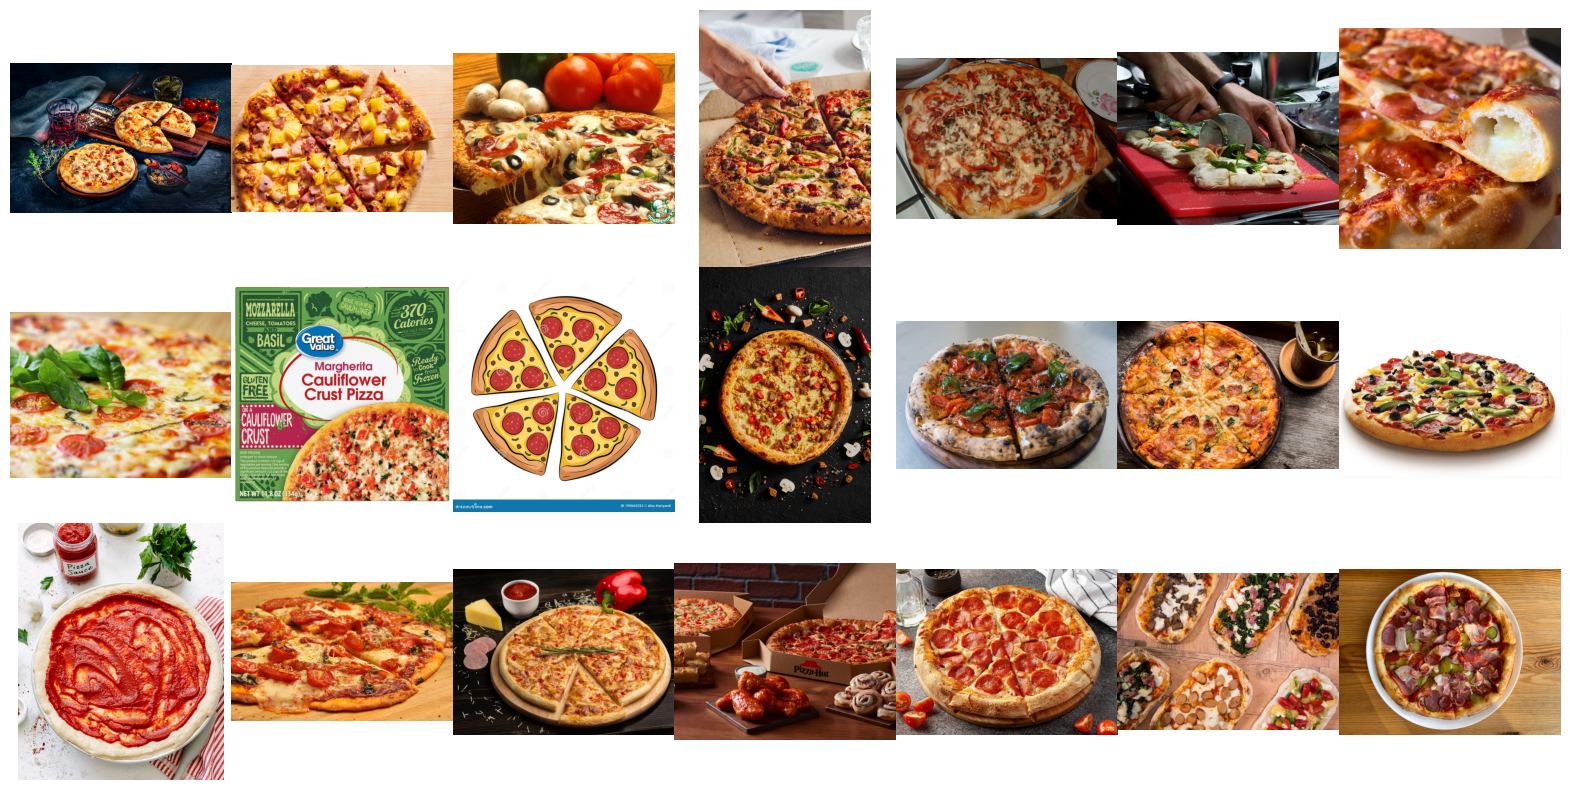

In [ ]:
#@title Отобразим случайные изображения из папки
import matplotlib.pyplot as plt
from PIL import Image
import random

# Получаем список всех файлов в папке
image_files = [f for f in os.listdir(input_dir) if f.endswith(('.png', '.jpg', '.jpeg'))]

# Перемешиваем изображения случайным образом
random.shuffle(image_files)

# Определим количество строк и колонок для сетки (например, 3x8)
rows = 3
cols = 7
fig, axes = plt.subplots(rows, cols, figsize=(20, 10))

# Удалим промежутки между изображениями
plt.subplots_adjust(wspace=0, hspace=0)

# Загрузим и отобразим каждое изображение
for i, ax in enumerate(axes.flatten()):
    if i < len(image_files):
        img_path = os.path.join(input_dir, image_files[i])
        img = Image.open(img_path)
        ax.imshow(img)
    ax.axis('off')  # Скрываем оси

# Показываем изображение на весь экран
plt.show()

*Рекомендуем просмотреть файлы лично , так как гарантировать устранения всех неподходящих изображений не будем*